In [10]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import sys
from array import array
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

from collections import defaultdict
# Insert the path of modules folder 
# sys.path.insert(0, 'C:/Users/Jason/thesis_project')
sys.path.append("../")

from support import *
from features.feature_ts import genX
from experiment.algorithms.cluster_prep import *

In [2]:
X = genX([1994,2014], drop_0 = True)

Xbin = xBins(X, 'amd')

dropping all zero rows


### Looking at users from a specific bin 600-1200

In [106]:
list_len = []
list_ids = []

for ids in Xbin['2500-4000']:
    list_ids.append(ids)
    list_len.append(len(X.loc[ids,:]))

# Find the household that logged the most data
ix = list_len.index(max(list_len))

# Store the households ID
house_id = list_ids[ix]

# Create a dataframe with all of that households data
A = X.loc[house_id,:]
H = A.copy()

In [309]:
Xbin['400-600'][12]

48

In [318]:
df = X.loc[48].describe()

In [319]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,4.956025,5.008778,5.048321,5.095433,5.097645,5.039162,4.767557,4.190748,3.673335,3.359094,...,3.186836,3.263465,3.421676,3.753578,4.062426,4.314602,4.484719,4.657713,4.792729,4.875167
std,1.454351,1.491937,1.500260,1.477549,1.470576,1.446532,1.415395,1.347975,1.242055,1.130888,...,1.062646,1.087749,1.127629,1.180061,1.202035,1.252143,1.317371,1.352434,1.389137,1.413156
min,2.365167,2.372833,2.373250,2.352417,2.337583,2.330583,2.330750,2.347833,2.411250,2.460333,...,2.429333,2.393083,2.397083,2.367917,2.133000,2.351833,2.372500,2.399250,2.393500,2.368833
25%,3.795167,3.831896,3.938292,3.928687,3.829375,3.922833,3.709563,3.140833,2.831479,2.730104,...,2.651375,2.666563,2.739646,2.896937,3.182979,3.342396,3.457250,3.582167,3.763542,3.847812
50%,4.963375,5.092583,5.162792,5.264792,5.236500,5.129000,4.715250,3.860417,3.139208,2.875875,...,2.790625,2.833458,2.962000,3.363292,3.782042,4.115250,4.363833,4.632208,4.786083,4.877000
75%,6.075937,6.213687,6.260250,6.162229,6.187354,6.185938,5.900875,5.058750,4.078708,3.488236,...,3.096354,3.265542,3.587063,4.267000,4.697271,4.965563,5.245083,5.506208,5.750167,5.817083
max,9.088333,9.043750,9.024667,9.030917,8.990583,8.827167,8.743833,8.540583,8.437083,7.758417,...,7.594917,7.556583,7.589333,7.666417,8.039083,8.304583,8.547917,8.818583,9.086917,9.167917


In [320]:
df.drop(['count','std','min','25%','50%','75%','max'], axis = 0, inplace=True)

In [ ]:
# Original find_peaks 1
# def find_peaksMA(X):
    
#     df = X.copy()
#     arrayX  = X.to_numpy().copy()
#     arrayY = X.to_numpy().copy()

#     listYM  = list(map(lambda x : x[3:11],arrayY))
#     listYA  = list(map(lambda x : x[17:],arrayY))

#     arrayYM = np.array(listYM)
#     arrayYA = np.array(listYA)
#     print(arrayYM)
#     # arrayYM.sort()
#     # arrayYA.sort()

#     dict_M = defaultdict(list)
#     dict_A = defaultdict(list)

#     df.reset_index(inplace = True)

#     for i in range(0,len(arrayX)):
#         indices_M = np.where(arrayYM[i] == np.amax(arrayYM[i]))
#         indices_A = np.where(arrayYA[i] == np.amax(arrayYA[i]))

#         dict_M[i].append(indices_M[0][0]) 
#         dict_A[i].append(indices_A[0][0])

#     ToP_M_df = pd.DataFrame.from_dict(dict_M)
#     ToP_A_df = pd.DataFrame.from_dict(dict_A)

#     top_M_dict = ToP_M_df.T + 3
#     top_A_dict = ToP_A_df.T + 17

#     dict_M.clear() 
#     dict_A.clear()


#     X1 = df.merge(top_M_dict, left_index = True, right_index = True).merge(top_A_dict,left_index = True, right_index = True)

#     return X1

In [482]:
# Original find_peaks 2
# def find_peaksMA(X):

#     df = X.copy()

#     arrayY = X.to_numpy().copy()

#     listYM  = list(map(lambda x : x[0:12],arrayY))
#     listYA  = list(map(lambda x : x[12:],arrayY))

#     arrayYM = np.array(listYM)
#     arrayYA = np.array(listYA)

#     arrayYM1 = np.array(listYM)
#     arrayYA1 = np.array(listYA)
#     # df.reset_index(inplace = True)
#     # df.drop(['mean'], axis = 1, inplace=True)

#     indices_M = np.where(arrayYM[0] == np.amax(arrayYM[0]))
#     indices_A = np.where(arrayYA[0] == np.amax(arrayYA[0]))
#     # print('indices_M = {}'.format(indices_M))
#     # print(range_min3(df, indices_M[0]))
#     while range_min3(arrayYM1[0], indices_M[0]) == False:
#     # if range_min3(df, indices_A[0] + 17) == False:
#         # Find the second largest peak
#         arrayYM[0][np.where(arrayYM[0] == np.amax(arrayYM[0]))] = 0
#         indices_M = np.where(arrayYM[0] == np.amax(arrayYM[0]))
#         # print(indices_M)
#         # print(arrayYM[0])
#         # print(range_min3(df, indices_A[0] + 17))

#     while range_min3(arrayYA1[0], indices_A[0]) == False:
#         # Find the second largest peak
#         arrayYA[0][np.where(arrayYA[0] == np.amax(arrayYA[0]))] = 0
#         indices_A = np.where(arrayYA[0] == np.amax(arrayYA[0]))


#     df['0_x'] = indices_M[0] 
#     df['0_y'] = indices_A[0] + 12 

#     return df

In [324]:
def find_peaksMA(X):

    df = X.copy()

    arrayY = X.to_numpy().copy()

    listYM  = list(map(lambda x : x[0:12],arrayY))
    listYA  = list(map(lambda x : x[12:],arrayY))

    arrayYM = np.array(listYM)
    arrayYA = np.array(listYA)

    arrayYM1 = np.array(listYM)
    arrayYA1 = np.array(listYA)

    indices_M = np.where(arrayYM[0] == np.amax(arrayYM[0]))
    indices_A = np.where(arrayYA[0] == np.amax(arrayYA[0]))

    while range_min3(arrayYM1[0], indices_M[0][0]) == False:
        arrayYM[0][np.where(arrayYM[0] == np.amax(arrayYM[0]))] = 0
        indices_M = np.where(arrayYM[0] == np.amax(arrayYM[0]))
        # print("arrayYM = {}".format(arrayYM))
        all_zeros = not np.any(arrayYM[0])
        if all_zeros == True:
            return df, False
        # print("all_zeros = {}".format(all_zeros))
  
    while range_min3(arrayYA1[0], indices_A[0][0]) == False:
        # Find the second largest peak
        arrayYA[0][np.where(arrayYA[0] == np.amax(arrayYA[0]))] = 0
        indices_A = np.where(arrayYA[0] == np.amax(arrayYA[0]))
        all_zeros = not np.any(arrayYA[0])
        if all_zeros == True:
            return df, False

    df['0_x'] = indices_M[0] 
    df['0_y'] = indices_A[0] + 12 

    return df, True

In [57]:
def slope():
    X = describe_household(id = 3223)
    df = X.copy()

    arrayY = X.to_numpy().copy()

    listYM  = list(map(lambda x : x[0:12],arrayY))
    listYA  = list(map(lambda x : x[11:],arrayY))

    arrayYM = np.array(listYM)
    arrayYA = np.array(listYA)

    return arrayYM, arrayYA

In [315]:
Xf = describe_household(id = 48)

In [316]:
Xf

False

In [65]:
slope_M, slope_A = slope()
slope_M[0]

In [21]:
len(slope_M[0])

12

In [30]:
y = slope_M[0]

In [31]:
dy=[y[i+1]-y[i] for i in range(len(y)-1)]
dy

[-0.27870524366696614,
 -0.19892677553201654,
 0.02495710524053507,
 -0.22672213194637303,
 0.0513256811379077,
 0.8227418060104057,
 1.1934092860485688,
 0.8785336096348653,
 0.3529451284185612,
 0.7280784424486901,
 1.0717934777989235]

In [433]:
dy[0]

-2.375449422345464

In [394]:
dpy=[dy[i+1]-dy[i] for i in range(len(dy)-1)]

In [395]:
dpy

[0.7404913747147917,
 -0.35893792477918063,
 2.602083900305389,
 -0.0968217178922266,
 0.5033853967160229,
 -1.9221843635278004,
 0.7421844806029703,
 0.11106321818473619,
 0.45369540533136554,
 0.2894185905157456]

#### Function that finds range

In [355]:
# def range_min1(df, indices_A):
#     i2 = 0
#     xpeak = indices_A[0]
#     Xpeak2 = df[str(xpeak)].values[0]

#     for c in df:
#         # print('Xpeak2 = {}'.format(Xpeak2))
#         # print('c = {}'.format(int(c)))
#         x2 = df[str(xpeak-int(c))].values[0]
#         difference = Xpeak2 - x2
        
#         if difference > 0.0:
#             Xpeak2 = x2
#         else:
#             i2 = xpeak-int(c) # i returns the index of the lower boundary of range
#             break
#     # print(i2)
#     if i2 == 0 or i2 == xpeak:
#         return False
#     else:
#         return True   

In [650]:
# def range_max(df, indices_A):
    
#     dy = [df[i+1]-df[i] for i in range(len(df)-1)]
#     print("indices_A[0] = {}".format(indices_A[0]))
#     if dy[indices_A[0] - 1] > 0:
#         return False    
#     else:
#         return True   

In [669]:
# Origin range_min3
# def range_min3(df, indices_A):

#     dy = [df[i+1]-df[i] for i in range(len(df)-1)]

#     if indices_A[0] == 0:
#         return False
#     elif dy[indices_A[0] - 1] < 0:
#         return False    
#     else:
#         return True   
    


In [255]:
def range_min3(df, indices_A):
    # print("df = {}".format(df))
    dy = [df[i+1]-df[i] for i in range(len(df)-1)]

    if indices_A == 11 or indices_A == 0 or indices_A == 12:
        return False  
    else:
        if dy[indices_A - 1] > 0 and dy[indices_A] < 0:
            # print("dy[indices_A - 2] < 0 and dy[indices_A - 1] > 0 = {} and {}".format(dy[indices_A - 2],dy[indices_A - 1]))
            return True    
        else:
            # print("dy[indices_A - 2] < 0 and dy[indices_A - 1] > 0 = {} and {}".format(dy[indices_A - 2],dy[indices_A - 1]))
            return False


No handles with labels found to put in legend.


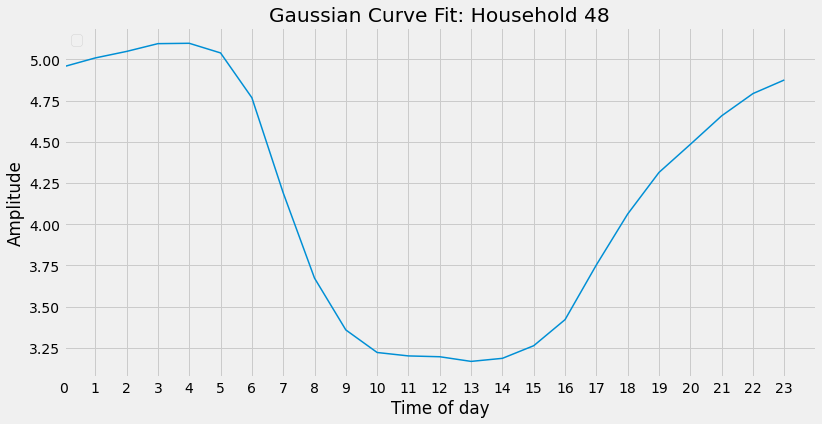

In [321]:
# build the plot
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')  
i = 48
# Plot the households loadprofile
# fig = plt.plot(describe_household(id = i).iloc[0,0:24], linewidth = 1.5)#, linestyle = 'dashed')
fig = plt.plot(df.iloc[0,0:24], linewidth = 1.5)#, linestyle = 'dashed')
plt.title("Household "+str(i))

# Plot Gauss Fit

# # ax.plot(x_all[:],y1[:],linewidth = 0.5, linestyle = 'dotted',color = 'purple')
# ax.plot(x_all[:10*df['0_x'].values[0]],y1[:10*df['0_x'].values[0]],linewidth = 1.5, color = 'purple',label = "Gauss 1, Sigma1 = " + str('{0:.3g}'.format(sigma1))+ ", RMSE = " + str('{0:.3g}'.format(RMSE1)))
# # ax.plot(x_all[:],y2[:],linewidth = 0.5, linestyle = 'dotted',color = 'red')
# ax.plot(x_all[10*df['0_x'].values[0]:],y2[10*df['0_x'].values[0]:],linewidth = 1.5,color = 'red', label = "Gauss 2, Sigma2 = " + str('{0:.3g}'.format(sigma2))+ ", RMSE = " + str('{0:.3g}'.format(RMSE2)))
# # ax.plot(x_all[:],y3[:],linewidth = 0.5, linestyle = 'dotted',color = 'cyan')
# ax.plot(x_all[:10*df['0_y'].values[0]],y3[:10*df['0_y'].values[0]],linewidth = 1.5, color = 'cyan',label = "Gauss 3, Sigma3 = " + str('{0:.3g}'.format(sigma3))+ ", RMSE = " + str('{0:.3g}'.format(RMSE3)))
# # ax.plot(x_all[:],y4[:],linewidth = 0.5, linestyle = 'dotted',color = 'green')
# ax.plot(x_all[10*df['0_y'].values[0]:],y4[10*df['0_y'].values[0]:],linewidth = 1.5, color = 'green',label = "Gauss 4, Sigma4 = " + str('{0:.3g}'.format(sigma4))+ ", RMSE = " + str('{0:.3g}'.format(RMSE4)))

plt.legend(loc = "upper left")
# Set the labels and axis limits
ax.set_xlim([0,24])
ax.set_xlabel('Time of day')
ax.set_ylabel("Amplitude")
ax.set_title('Gaussian Curve Fit: Household ' + str(i))

# # Save the figure
# plt.savefig('GaussCurveFit' + str(houseID) + '.png', dpi=72, bbox_inches='tight')
plt.show()

# Detremine where the daily data increases and decreases after and before the peaks

### Find the average profile of a user

In [11]:
import random

list_len = []
list_ids = []

for ids in Xbin['600-1200']:
    list_ids.append(ids)
    list_len.append(len(X.loc[ids,:]))


# Gauss Fit Code

#### First load the consumption data

In [4]:
X = genX([1994,2014], drop_0 = True)

Xbin = xBins(X, 'amd')

dropping all zero rows


#### Function to determine households mean, peak times

In [5]:
# def find_peaksMA(X):    
#     # Create a copy of households mean electricity usage
#     df = X.copy()

#     arrayX = X.to_numpy().copy()

#     listYM  = list(map(lambda x : x[:13],arrayX))
#     listYA  = list(map(lambda x : x[12:],arrayX))

#     arrayYM = np.array(listYM)
#     arrayYA = np.array(listYA)

#     dict_M = defaultdict(list)
#     dict_A = defaultdict(list)

#     # Determine the time when the peaks occur
#     indices_M = np.where(arrayYM[0] == np.amax(arrayYM[0]))
#     indices_A = np.where(arrayYA[0] == np.amax(arrayYA[0]))

#     dict_M[i].append(indices_M[0][0]) 
#     dict_A[i].append(indices_A[0][0])

#     ToP_M_df = pd.DataFrame.from_dict(dict_M)
#     ToP_A_df = pd.DataFrame.from_dict(dict_A)

#     top_M_dict = ToP_M_df.T
#     top_A_dict = ToP_A_df.T + 12 # Adjust for time

#     # Reset index to insure that the three dataframes below merge properly
#     top_M_dict = top_M_dict.reset_index()
#     top_M_dict.drop(['index'], axis = 1, inplace = True)

#     top_A_dict = top_A_dict.reset_index()
#     top_A_dict.drop(['index'], axis = 1, inplace = True)
    
#     df.reset_index(inplace = True)
#     df.drop(['index'], axis = 1, inplace = True)

#     dict_M.clear() 
#     dict_A.clear()


#     X1 = df.merge(top_M_dict, left_index = True, right_index = True).merge(top_A_dict,left_index = True, right_index = True)

#     return X1

### Function to select a household

In [7]:
def selectRandomUser(Household):

    house_id = Household
    
    # Create a dataframe with all of that households data
    A = X.loc[house_id,:]
    H = A.copy()

    return H

#### Function to extract households average profile info

In [8]:
def describe_household(id):
       # Household ids
       # id = [12020322]#[483]#[2230]#,1002790,483,3063,5351,12020322,5283,5293,168,7118,156,5239,29,1418,1005536]
       id = [id]

       for i in id:
              H = selectRandomUser(i)

              # H1 = find_peaksMA(H)
              H1_d = H.describe()

              H1_d = H1_d.drop(['count','std','min','max', '25%','50%','75%'])
              
              H1_d1 = find_peaksMA(H1_d)

       # H1_d1.drop("mean", axis = 1, inplace=True)
              
       return H1_d1

#### Code to create Gaussian

In [9]:
#Define the Gaussian function
def gauss(x, H, A, mu, sigma):
    return H + A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

#### Code to plot the Gaussian fit

In [9]:
def plotGaussFit(y2):
    # Household ids
    # id = [2230]#,1002790,483,3063,5351,12020322,5283,5293,168,7118,156,5239,29,1418,1005536]

    x_all = np.arange(0, 24, 0.001) # entire range of x, both in and out of spec

    # build the plot
    fig, ax = plt.subplots(figsize=(12,6))
    plt.style.use('fivethirtyeight')  

    # Plot the households loadprofile
    fig = plt.plot(describe_household(id).iloc[0,0:24])
    plt.title("Household "+str(i))

    # Plot Gaussian fit
    ax.plot(x_all,y2)

    # Set the labels and axis limits
    ax.set_xlim([0,24])
    ax.set_xlabel('Time of day')
    ax.set_ylabel("Amplitude")
    ax.set_title('Gaussian Curve Fit')

    # # Save the figure
    # plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
    plt.show()

## START

#### Extract variables

In [12]:
# id = [12020322]#[483]#[2230]#,1002790,483,3063,5351,12020322,5283,5293,168,7118,156,5239,29,1418,1005536]

#  1005558,  1006685,  1006691, 12029058, 12029066
houseID = 156

df = describe_household(id = houseID)

# Determine the y-offset i.e. minimum value in day
H_offset = df.iloc[0,:24].min()

# Determine the amplitude of gaussian
A1 = df[str(df['0_x'].values[0])].values[0] - H_offset # Adjust for offset
A2 = df[str(df['0_y'].values[0])].values[0] - H_offset

# Determine the mean of the gaussian
mu1 = df['0_x'].values[0]
mu2 = df['0_y'].values[0]

##### Get initial guesses for sigmas and Gaussians

In [13]:
def initialSigma1(increment = 0):
    

    # Conditional if statement to check that 
    p1 = 4 + increment

    i1 = 0

    Xpeak1 = df[str(df['0_x'].values[0])].values[0]

    for c in df:
        # print("c = {}, df['0_x'] = {}".format())
        if int(c) != df['0_x'].values[0]:
            x1 = df[str(df['0_x'].values[0] - int(c))].values[0]
            temp1 = Xpeak1 - x1
            # print("temp1 = Xpeak1 - x1 = {} - {} = {}".format(Xpeak1,x1,temp1))

            if temp1 >= 0.0:
                Xpeak1 = x1
            else:
                i1 = df['0_x'].values[0]-int(c)+1 # i returns the index of the lower boundary of range
                break
        else:
            i1 = df['0_x'].values[0]-int(c)+1 # i returns the index of the lower boundary of range
            break

    range1 = 2*(np.sqrt((df['0_x'].values[0] - i1)**2))

    # If statement to determine index at which to calculate error
    if range1/2 < 3:
        c1 = 1
    elif range1/2 == 3:
        c1 = 1
    elif range1/2 > 3:
        c1 = 2
    
    print("range/2 = {} thus c1 = {}".format(range1/2, c1))
    print("range/2 = {}".format(range1/2))
    sigma1 = range1/p1

    return sigma1, i1, c1


# sigma1, sigma2, i1, i2 = initialSigma1()
# y2 = gauss(x_all, H_offset,A1,mu1,initialSigma2())

In [174]:
def initialSigma3(increment = 0):
    

    # Conditional if statement to check that 
    p2 = 4 + increment

    # i1 = 0
    i2 = 0

    Xpeak2 = df[str(df['0_y'].values[0])].values[0]

    for c in df:
        x2 = df[str(df['0_y'].values[0]-int(c))].values[0]
        temp2 = Xpeak2 - x2
        
        if temp2 >= 0.0:
            Xpeak2 = x2
        else:
            i2 = df['0_y'].values[0]-int(c)+1 # i returns the index of the lower boundary of range
            break

    range2 = 2*(np.sqrt((df['0_y'].values[0] - i2)**2))

    # If statement to determine index at which to calculate error
    if range2/2 < 3:
        c1 = 1
    elif range2/2 == 3:
        c1 = 1
    elif range2/2 > 3:
        c1 = 2
    
    print("range/2 = {} thus c1 = {}".format(range2/2, c1))

    sigma2 = range2/p2

    return sigma2, i2, c1


# sigma1, sigma2, i1, i2 = initialSigma1()

In [175]:
x_all = np.arange(0, 24)

def initialSigma2(increment = 0):
    x_all = np.arange(0, 24)

    # Conditional if statement to check that 
    p1 = 4 + increment

    i1 = 0

    Xpeak1 = df[str(df['0_x'].values[0])].values[0]# Get the value at the peak
    
    for c in df:
        x1 = df[str(df['0_x'].values[0]+int(c))].values[0]
        temp1 = Xpeak1 - x1
        # print("temp1 = Xpeak1 - x1 = {} - {} = {}".format(Xpeak1,x1,temp1))
        if temp1 >= 0:
            Xpeak1 = x1
        else:
            i1 = df['0_x'].values[0]+int(c)-1 # i returns the index of the lower boundary of range
            break

    range1 = 2*(np.sqrt((df['0_x'].values[0] - i1)**2))

    # If statement to determine index at which to calculate error
    if range1/2 < 3:
        c1 = 1
    elif range1/2 == 3:
        c1 = 1
    elif range1/2 > 3:
        c1 = 2
    
    print("range/2 = {} thus c1 = {}".format(range1/2, c1))
    sigma1 = range1/p1

    return sigma1, i1, c1

# y2 = gauss(x_all, H_offset,A1,mu1,initialSigma2())

In [176]:
def initialSigma4(increment=0):
    # Conditional if statement to check that 
    p2 = 4 + increment

    i2 = 0

    Xpeak2 = df[str(df['0_y'].values[0])].values[0]# Get the value at the peak
    
    for c in df:
        try:
            x2 = df[str(df['0_y'].values[0]+int(c))].values[0] # Get the one after the peak
            temp2 = Xpeak2 - x2
            # print("temp2 = Xpeak2 - x2 = {} - {} = {}".format(Xpeak2,x2,temp2))
            
            if temp2 >= 0:
                Xpeak2 = x2
            else:
                i2 = df['0_y'].values[0]+int(c)-1 # i returns the index of the lower boundary of range
                break
            
        except KeyError:
            i2 = df['0_y'].values[0]+int(c)-1
            break

    range2 = 2*(np.sqrt((df['0_y'].values[0] - i2)**2))
    
    # If statement to determine index at which to calculate error
    if range2/2 < 3:
            c1 = 1
    elif range2/2 == 3:
        c1 = 1
    elif range2/2 > 3:
        c1 = 2
    
    print("range/2 = {} thus c1 = {}".format(range2/2, c1))

    sigma2 = range2/p2

    return sigma2, i2, c1

#### Create code that calculates the error

#### Create loop that adjusts the std deviation until error is reduced satisfactorily

##### Error code for gauss1

In [177]:
# Code that finds the value one point above the range index
sigma1, i1, c = initialSigma1()

xprofile1 = df[str(df['0_x'].values[0] - c)].values[0] # Get the amplitude values one point above the min index

xgauss = gauss(df['0_x'].values[0] - c, H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min range amplitude

error1 = xgauss - xprofile1# Calculate the error between these points

tolerance1 = 0.1
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while np.sqrt(error1**2) > tolerance1:
    previous_error1 = error1

    sigma1, i1, c = initialSigma1(increment = i)
    xgauss = gauss(df['0_x'].values[0] - c, H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
    error1 = xgauss - xprofile1# Calculate the error between these points

    # conditional for gauss 1
    if error1 > previous_error1:
        i = i + 0.1
        sigma1, i1, c = initialSigma1(increment = i)
        xgauss = gauss(df['0_x'].values[0] - c, H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        error1 = xgauss - xprofile1# Calculate the error between these points
    else:
        i = i - 0.1
        sigma1, i1, c = initialSigma1(increment = i)
        xgauss = gauss(df['0_x'].values[0] - c, H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        error1 = xgauss - xprofile1# Calculate the error between these points

    t = t + 1
    if t >= 100:
        tolerance1 = tolerance1 + 0.1

sigma1 = np.sqrt(sigma1**2)
print("sigma4 = {}".format(sigma1))
print("error1 = xgauss - xprofile1 = {} - {} = {}".format(xgauss,xprofile1,error1))

range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0
range/2 = 7.0 thus c1 = 2
range/2 = 7.0


#### Error code for gauss 3

In [178]:
# Code that finds the value one point above the range index
sigma3, i3, c = initialSigma3()

xprofile3 = df[str(df['0_y'].values[0] - c)].values[0] # Get the amplitude values one point above the min index

xgauss = gauss(df['0_y'].values[0] - c, H_offset,A2,mu2,sigma3) # Get the value of the gauss one point above the min range amplitude

error3 = xgauss - xprofile3# Calculate the error between these points

tolerance1 = 0.1
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while np.sqrt(error3**2) > tolerance1:
    previous_error3 = error3

    sigma3, i3, c = initialSigma3(increment = i)
    xgauss = gauss(df['0_y'].values[0] - c, H_offset,A2,mu2,sigma3) # Get the value of the gauss one point above the min peak
    error3 = xgauss - xprofile3# Calculate the error between these points

    # conditional for gauss 1
    if error3 > previous_error3:
        i = i + 0.1
        sigma3, i3, c = initialSigma3(increment = i)
        xgauss = gauss(df['0_y'].values[0] - c, H_offset,A2,mu2,sigma3) # Get the value of the gauss one point above the min peak
        error3 = xgauss - xprofile3# Calculate the error between these points
    else:
        i = i - 0.1
        sigma3, i3, c = initialSigma3(increment = i)
        xgauss = gauss(df['0_y'].values[0] - c, H_offset,A2,mu2,sigma3) # Get the value of the gauss one point above the min peak
        error3 = xgauss - xprofile3# Calculate the error between these points

    t = t + 1
    if t >= 100:
        tolerance1 = tolerance1 + 0.1

sigma3 = np.sqrt(sigma3**2)
print("sigma4 = {}".format(sigma3))
print("error1 = xgauss - xprofile3 = {} - {} = {}".format(xgauss,xprofile3,error3))

range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.0 thus c1 = 1
range/2 = 3.

#### Error code for gauss2

In [179]:
sigma2, i2, c = initialSigma2()

xprofile2 = df[str(df['0_x'].values[0] + c)].values[0] # Get the amplitude values one point below the max index

xgauss = gauss(df['0_x'].values[0] + c, H_offset,A1,mu1,sigma2) # Get the value of the gauss one point below the max index amplitude

error2 = xgauss - xprofile2# Calculate the error between these points

tolerance2 = 0.1
i = 0.5 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while np.sqrt(error2**2) > tolerance2:
    previous_error2 = error2
    print("error2 = xgauss - xprofile2 = {} - {} = {}".format(xgauss,xprofile2,error2))
    sigma2, i2, c = initialSigma2(increment = i)
    xgauss = gauss(df['0_x'].values[0] + c, H_offset,A1,mu1,sigma2) # Get the value of the gauss one point below the max index peak
    error2 = xgauss - xprofile2# Calculate the error between these points
    
    # Conditional for gauss2
    if error2 > previous_error2:
        i = i + 0.1
        sigma2, i2, c = initialSigma2(increment = i)
        xgauss = gauss(df['0_x'].values[0] + c, H_offset,A1,mu1,sigma2) # Get the value of the gauss one point below the max index peak
        error2 = xgauss - xprofile2# Calculate the error between these points
    else:
        i = i -0.1        
        sigma2, i2, c = initialSigma2(increment = i)
        xgauss = gauss(df['0_x'].values[0] + c, H_offset,A1,mu1,sigma2) # Get the value of the gauss one point below the max peak
        error2 = xgauss - xprofile2# Calculate the error between these points

    t = t + 1
    if t >= 100:
        tolerance2 = tolerance2 + 0.1

sigma2 = np.sqrt(sigma2**2)
# print("sigma4 = {}".format(sigma2))
# print("error2 = xgauss - xprofile2 = {} - {} = {}".format(xgauss,xprofile2,error2))

range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.51890437764344 - 39.40072327044025 = -2.881818892796815
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 35.84691640968567 - 39.40072327044025 = -3.553806860754584
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.01791598485062 - 39.40072327044025 = -3.382807285589635
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.186991994977376 - 39.40072327044025 = -3.2137312754628766
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.354027121003476 - 39.40072327044025 = -3.0466961494367766
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.51890437764344 - 39.40072327044025 = -2.881818892796815
range/2 = 6.0 thus c1 = 2
range/2 = 6.0 thus c1 = 2
error2 = xgauss - xprofile2 = 36.68150724796681 - 39.40072327044025 = -2.7192160224734394
range/2 = 6.0 thus c1 = 2
range/2 

#### Error code for gauss 4

In [180]:
sigma4, i4, c = initialSigma4()

print(i4)

xprofile4 = df[str(df['0_y'].values[0] + c)].values[0] # Get the amplitude values one point below the max index

xgauss = gauss(df['0_y'].values[0] + c, H_offset,A2,mu2,sigma4) # Get the value of the gauss one point below the max index amplitude

error4 = xgauss - xprofile4# Calculate the error between these points

tolerance2 = 0.1
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while np.sqrt(error4**2) > tolerance2:
    previous_error4 = error4

    sigma4, i4, c = initialSigma4(increment = i)
    xgauss = gauss(df['0_y'].values[0] + c, H_offset,A2,mu2,sigma4) # Get the value of the gauss one point below the max index peak
    error4 = xgauss - xprofile4# Calculate the error between these points
    
    # Conditional for gauss2
    if error4 > previous_error4:
        i = i + 0.1
        sigma4, i4, c = initialSigma4(increment = i)
        xgauss = gauss(df['0_y'].values[0] + c, H_offset,A2,mu2,sigma4) # Get the value of the gauss one point below the max index peak
        error4 = xgauss - xprofile4# Calculate the error between these points
    else:
        i = i - 0.1        
        sigma4, i4, c = initialSigma4(increment = i)
        xgauss = gauss(df['0_y'].values[0] + c, H_offset,A2,mu2,sigma4) # Get the value of the gauss one point below the max peak
        error4 = xgauss - xprofile4# Calculate the error between these points

    t = t + 1
    if t >= 100:
        tolerance2 = tolerance2 + 0.1

sigma4 = np.sqrt(sigma4**2)
print("sigma4 = {}".format(sigma4))
print("error2 = xgauss - xprofile2 = {} - {} = {}".format(xgauss,xprofile4,error4))

range/2 = 4.0 thus c1 = 2
23
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 = 4.0 thus c1 = 2
range/2 =

#### Create function that plots all 4 gaussians

In [404]:
# sigma1, sigma3, i1, i3= initialSigma1()
# sigma2, sigma4, i2, i4 = initialSigma2()
x_all = np.arange(0, 24, 0.1) # entire range of x, both in and out of spec
y1 = gauss(x_all, H_offset,A1,mu1,sigma1)
y2 = gauss(x_all, H_offset,A1,mu1,sigma2)
y3 = gauss(x_all, H_offset,A2,mu2,sigma3)
y4 = gauss(x_all, H_offset,A2,mu2,sigma4)

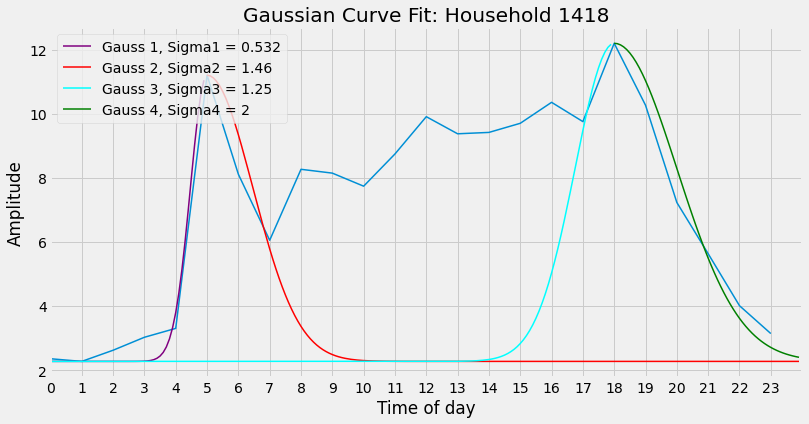

In [405]:
# build the plot
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')  

# Plot the households loadprofile
fig = plt.plot(describe_household(id = houseID).iloc[0,0:24], linewidth = 1.5)#, linestyle = 'dashed')
plt.title("Household "+str(i))

# Plot Gauss Fit

# ax.plot(x_all[:],y1[:],linewidth = 0.5, linestyle = 'dotted',color = 'purple')
ax.plot(x_all[:10*df['0_x'].values[0]],y1[:10*df['0_x'].values[0]],linewidth = 1.5, color = 'purple',label = "Gauss 1, Sigma1 = " + str('{0:.3g}'.format(sigma1)))
# ax.plot(x_all[:],y2[:],linewidth = 0.5, linestyle = 'dotted',color = 'red')
ax.plot(x_all[10*df['0_x'].values[0]:],y2[10*df['0_x'].values[0]:],linewidth = 1.5,color = 'red', label = "Gauss 2, Sigma2 = " + str('{0:.3g}'.format(sigma2)))
# ax.plot(x_all[:],y3[:],linewidth = 0.5, linestyle = 'dotted',color = 'cyan')
ax.plot(x_all[:10*df['0_y'].values[0]],y3[:10*df['0_y'].values[0]],linewidth = 1.5, color = 'cyan',label = "Gauss 3, Sigma3 = " + str('{0:.3g}'.format(sigma3)))
# ax.plot(x_all[:],y4[:],linewidth = 0.5, linestyle = 'dotted',color = 'green')
ax.plot(x_all[10*df['0_y'].values[0]:],y4[10*df['0_y'].values[0]:],linewidth = 1.5, color = 'green',label = "Gauss 4, Sigma4 = " + str('{0:.3g}'.format(sigma4)))

plt.legend(loc = "upper left")
# Set the labels and axis limits
ax.set_xlim([0,24])
ax.set_xlabel('Time of day')
ax.set_ylabel("Amplitude")
ax.set_title('Gaussian Curve Fit: Household ' + str(houseID))

# # Save the figure
plt.savefig('GaussCurveFit' + str(houseID) + '.png', dpi=72, bbox_inches='tight')
plt.show()

### Create code that plots the sigma changes

In [125]:
# y2 = gauss(x_all, H_offset,A1,mu1,initialSigma())
# # Household ids
# # id = [2230]#,1002790,483,3063,5351,12020322,5283,5293,168,7118,156,5239,29,1418,1005536]

# x_all = np.arange(0, 24, 0.001) # entire range of x, both in and out of spec

# # build the plot
# fig, ax = plt.subplots(figsize=(12,6))
# plt.style.use('fivethirtyeight')  

# # Plot the households loadprofile
# fig = plt.plot(describe_household().iloc[0,0:24])
# plt.title("Household "+str(i))

# # Plot Gaussian fit
# ax.plot(x_all[:len(x_all)//4],y2[:len(y2)//4], linewidth = 0.8)

# for i in np.arange(0,1,0.2):
#     y2 = gauss(x_all, H_offset,A1,mu1,initialSigma()+i)
#     # Plot Gaussian fit
#     ax.plot(x_all[:len(x_all)//4],y2[:len(y2)//4],linewidth = 0.5)

# # Set the labels and axis limits
# ax.set_xlim([0,24])
# ax.set_xlabel('Time of day')
# ax.set_ylabel("Amplitude")
# ax.set_title('Gaussian Curve Fit')

# # # Save the figure
# # plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
# plt.show()

In [126]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,0_x,0_y
0,7.473297,5.097847,3.462889,1.468993,2.077181,2.588547,3.603299,2.695866,2.530618,2.476433,...,5.741637,9.177487,9.336756,7.231967,6.298408,5.539999,4.22081,3.55262,3,13


In [578]:
# Create dataframe to store RMSE
list_ids = []
for id in Xbin['400-600']:
    list_ids.append(id)

In [579]:
list_ids[227]

1417

In [257]:
# id = [12020322]#[483]#[2230]#,1002790,483,3063,5351,12020322,5283,5293,168,7118,156,5239,29,1418,1005536]

#  1005558,  1006685,  1006691, 12029058, 12029066
houseID = 1417

df = describe_household(id = houseID)

# Determine the y-offset i.e. minimum value in day
H_offset = df.iloc[0,:24].min()

# Determine the amplitude of gaussian
A1 = df[str(df['0_x'].values[0])].values[0] - H_offset # Adjust for offset
A2 = df[str(df['0_y'].values[0])].values[0] - H_offset

# Determine the mean of the gaussian
mu1 = df['0_x'].values[0]
mu2 = df['0_y'].values[0]

len(arrayYA) = 12


#### New and improved Function that calculates overall error of gauss fit

In [258]:
from sklearn.metrics import mean_squared_error
import math

In [259]:
def Sigma1(increment = 0):
    # Conditional if statement to check that 
    p1 = 4 + increment

    i1 = 0

    Xpeak1 = df[str(df['0_x'].values[0])].values[0]

    for c in df:
        if int(c) != df['0_x'].values[0]:
            x1 = df[str(df['0_x'].values[0] - int(c))].values[0]
            temp1 = Xpeak1 - x1

            if temp1 >= 0.0:
                Xpeak1 = x1
            else:
                i1 = df['0_x'].values[0]-int(c) # i returns the index of the lower boundary of range
                break
        else:
            i1 = df['0_x'].values[0]-int(c) # i returns the index of the lower boundary of range
            break

    range1 = 2*(np.sqrt((df['0_x'].values[0] - i1)**2))
    
    sigma1 = range1/p1

    return sigma1, i1

In [260]:
# Code that finds the value one point above the range index
sigma1, i1 = Sigma1()

# Calculate error
actual = df.iloc[0,i1:df['0_x'].values[0]].to_list()
predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1)
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)

tolerance1 = RMSE - RMSE*0.95
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while RMSE > tolerance1:
    previous_error1 = RMSE

    sigma1, i1= Sigma1(increment = i)
    predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)   
    # conditional for gauss 1
    if RMSE > previous_error1:
        i = i + 0.1
        sigma1, i1 = Sigma1(increment = i)
        predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE) 
    else:
        i = i - 0.1
        sigma1, i1 = Sigma1(increment = i)
        predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE) 

    t = t + 1
    if t >= 10000:
        t = 0
        i = 0
        tolerance1 = tolerance1 + 0.1

RMSE1 = RMSE
print("RMSE1 = {}".format(RMSE1))
sigma1 = np.sqrt(sigma1**2)

RMSE1 = 0.37241344471768706


In [261]:
i1

2

In [262]:
def Sigma2(increment = 0):
    # Conditional if statement to check that 
    p1 = 4 + increment

    i1 = 0

    Xpeak1 = df[str(df['0_x'].values[0])].values[0]# Get the value at the peak
    
    for c in df:
        x1 = df[str(df['0_x'].values[0]+int(c))].values[0]
        temp1 = Xpeak1 - x1
        # print("temp1 = Xpeak1 - x1 = {} - {} = {}".format(Xpeak1,x1,temp1))
        if temp1 >= 0:
            Xpeak1 = x1
        else:
            i1 = df['0_x'].values[0]+int(c) # i returns the index of the lower boundary of range
            break

    range1 = 2*(np.sqrt((df['0_x'].values[0] - i1)**2))

    sigma1 = range1/p1

    return sigma1, i1


In [263]:
sigma2, i2= Sigma2()

# Calculate error
actual = df.iloc[0,df['0_x'].values[0]:i2].to_list()
predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)

tolerance2 = RMSE - RMSE*0.95
print(tolerance2)
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while RMSE > tolerance2:

    # print("RMSE = {}".format(RMSE))
    # print("tolerance2 = {}".format(tolerance2))
    # print("actual = {}".format(actual))
    # print("predicted = {}".format(predicted))
    previous_error2 = RMSE
    sigma2, i2 = Sigma2(increment = i)
    predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    
    # Conditional for gauss2
    if RMSE > previous_error2:
        i = i + 0.1
        sigma2, i2 = Sigma2(increment = i)
        predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)
    else:
        i = i -0.1        
        sigma2, i2 = Sigma2(increment = i)
        predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)

    t = t + 1
    if t >= 1000:
        t = 0
        i = 0
        tolerance2 = tolerance2 + 0.1


RMSE2 = RMSE
print("RMSE2 = {}".format(RMSE2))
sigma2 = np.sqrt(sigma2**2)

0.031267216463507386
RMSE2 = 0.42685852928417467


In [264]:
def Sigma3(increment = 0):  
    # Conditional if statement to check that 
    p2 = 4 + increment

    # i1 = 0
    i2 = 0

    Xpeak2 = df[str(df['0_y'].values[0])].values[0]

    for c in df:
        x2 = df[str(df['0_y'].values[0]-int(c))].values[0]
        temp2 = Xpeak2 - x2
        
        if temp2 >= 0.0:
            Xpeak2 = x2
        else:
            i2 = df['0_y'].values[0]-int(c)+1 # i returns the index of the lower boundary of range
            break

    range2 = 2*(np.sqrt((df['0_y'].values[0] - i2)**2))

    sigma2 = range2/p2

    return sigma2, i2


In [265]:
# Code that finds the value one point above the range index
sigma3, i3 = Sigma3()

# Calculate error
actual = df.iloc[0,i3:df['0_y'].values[0]].to_list()
predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)

tolerance1 = RMSE - RMSE*0.95
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while RMSE > tolerance1:
    previous_error3 = RMSE
    # print(sigma3)
    # print("RMSE = {}".format(RMSE))

    sigma3, i3 = Sigma3(increment = i)
    predicted = gauss(np.arange(i3,df['0_y'].values[0],1), H_offset, A2, mu2, sigma3)
    # print('actual = {}'.format(actual))
    # print('predicted = {}'.format(predicted))
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)

    # conditional for gauss 1
    if RMSE > previous_error3:
        i = i + 0.1
        sigma3, i3 = Sigma3(increment = i)
        predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)
    else:
        i = i - 0.1
        sigma3, i3 = Sigma3(increment = i)
        predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)

    t = t + 1
    if t >= 10000:
        t = 0
        i = 0
        tolerance1 = tolerance1 + 0.1
   

RMSE3 = RMSE
print("RMSE3 = {}".format(RMSE))
sigma3 = np.sqrt(sigma3**2)


RMSE3 = 0.11796071328532277


In [266]:
i3

10

In [267]:
df['0_y']

mean    13
Name: 0_y, dtype: int64

In [268]:
def Sigma4(increment=0):
    # Conditional if statement to check that 
    p2 = 4 + increment

    i2 = 0

    Xpeak2 = df[str(df['0_y'].values[0])].values[0]# Get the value at the peak
    
    for c in df:
        try:
            x2 = df[str(df['0_y'].values[0]+int(c))].values[0] # Get the one after the peak
            temp2 = Xpeak2 - x2
            # print("temp2 = Xpeak2 - x2 = {} - {} = {}".format(Xpeak2,x2,temp2))
            
            if temp2 >= 0:
                Xpeak2 = x2
            else:
                i2 = df['0_y'].values[0]+int(c) # i returns the index of the lower boundary of range
                break
            
        except KeyError:
            i2 = df['0_y'].values[0]+int(c)
            break

    range2 = 2*(np.sqrt((df['0_y'].values[0] - i2)**2))
    
    sigma2 = range2/p2

    return sigma2, i2

In [269]:
sigma4, i4= Sigma4()

actual = df.iloc[0,df['0_y'].values[0]:i4].to_list()
predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)

tolerance2 = RMSE - RMSE*0.95
# print(tolerance2)
i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
t = 0
while RMSE > tolerance2:
    previous_error4 = RMSE
    # print('sigma4 = {}'.format(sigma4))
    # print('RMSE = {}'.format(RMSE))
    sigma4, i4 = Sigma4(increment = i)
    predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    
    # Conditional for gauss2
    if RMSE > previous_error4:
        i = i + 0.1
        sigma4, i4 = Sigma4(increment = i)
        predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)

    else:
        i = i - 0.1        
        sigma4, i4 = Sigma4(increment = i)
        predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)

    t = t + 1
    if t >= 10000:
        t = 0
        i = 0
        tolerance2 = tolerance2 + 0.1
print(tolerance2)
RMSE4 = RMSE
sigma4 = np.sqrt(sigma4**2)


0.10805555369870357


#### Plot Gaussian Fit

In [270]:
# sigma1, sigma3, i1, i3= initialSigma1()
# sigma2, sigma4, i2, i4 = initialSigma2()
x_all = np.arange(0, 24, 0.1) # entire range of x, both in and out of spec
y1 = gauss(x_all, H_offset,A1,mu1,sigma1)
y2 = gauss(x_all, H_offset,A1,mu1,sigma2)
y3 = gauss(x_all, H_offset,A2,mu2,sigma3)
y4 = gauss(x_all, H_offset,A2,mu2,sigma4)

In [271]:
df['0_x'].values[0]

6

len(arrayYA) = 12


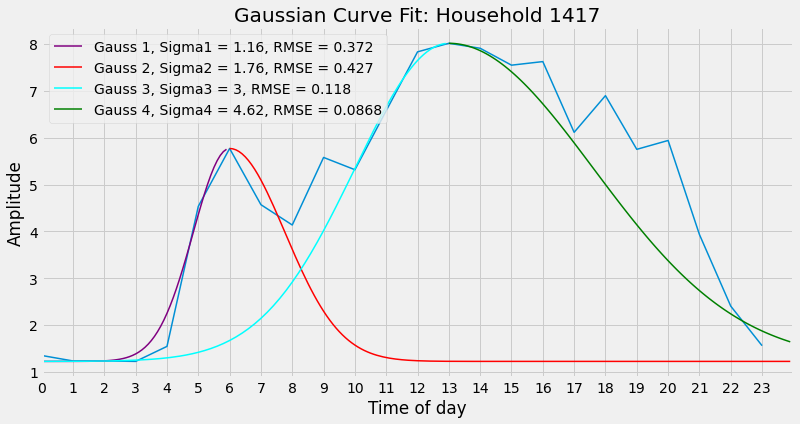

In [272]:
# build the plot
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')  

# Plot the households loadprofile
fig = plt.plot(describe_household(id = houseID).iloc[0,0:24], linewidth = 1.5)#, linestyle = 'dashed')
plt.title("Household "+str(i))

# Plot Gauss Fit

# ax.plot(x_all[:],y1[:],linewidth = 0.5, linestyle = 'dotted',color = 'purple')
ax.plot(x_all[:10*df['0_x'].values[0]],y1[:10*df['0_x'].values[0]],linewidth = 1.5, color = 'purple',label = "Gauss 1, Sigma1 = " + str('{0:.3g}'.format(sigma1))+ ", RMSE = " + str('{0:.3g}'.format(RMSE1)))
# ax.plot(x_all[:],y2[:],linewidth = 0.5, linestyle = 'dotted',color = 'red')
ax.plot(x_all[10*df['0_x'].values[0]:],y2[10*df['0_x'].values[0]:],linewidth = 1.5,color = 'red', label = "Gauss 2, Sigma2 = " + str('{0:.3g}'.format(sigma2))+ ", RMSE = " + str('{0:.3g}'.format(RMSE2)))
# ax.plot(x_all[:],y3[:],linewidth = 0.5, linestyle = 'dotted',color = 'cyan')
ax.plot(x_all[:10*df['0_y'].values[0]],y3[:10*df['0_y'].values[0]],linewidth = 1.5, color = 'cyan',label = "Gauss 3, Sigma3 = " + str('{0:.3g}'.format(sigma3))+ ", RMSE = " + str('{0:.3g}'.format(RMSE3)))
# ax.plot(x_all[:],y4[:],linewidth = 0.5, linestyle = 'dotted',color = 'green')
ax.plot(x_all[10*df['0_y'].values[0]:],y4[10*df['0_y'].values[0]:],linewidth = 1.5, color = 'green',label = "Gauss 4, Sigma4 = " + str('{0:.3g}'.format(sigma4))+ ", RMSE = " + str('{0:.3g}'.format(RMSE4)))

plt.legend(loc = "upper left")
# Set the labels and axis limits
ax.set_xlim([0,24])
ax.set_xlabel('Time of day')
ax.set_ylabel("Amplitude")
ax.set_title('Gaussian Curve Fit: Household ' + str(houseID))

# # Save the figure
# plt.savefig('GaussCurveFit' + str(houseID) + '.png', dpi=72, bbox_inches='tight')
plt.show()

## Calculate the RMSE of the entire profile

In [273]:
x_1 = np.arange(0, mu1, 1)
x_2 = np.arange(mu1, i2, 1)
x_3 = np.arange(i3, mu2,1)
x_4 = np.arange(mu2, 24,1)

x_vals = np.hstack((x_1,x_2,x_3,x_4))
x_vals_1 = np.unique(x_vals)


In [274]:
x_1

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [275]:
x_2

array([6, 7, 8], dtype=int64)

In [276]:
x_3

array([10, 11, 12], dtype=int64)

In [277]:
x_4

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

#### Create synthetic profile

In [278]:
def straight_line(m,x,b):
    return m*x+b

In [279]:
y1 = gauss(x_1, H_offset,A1,mu1,sigma1)
y2 = gauss(x_2, H_offset,A1,mu1,sigma2)
y3 = gauss(x_3, H_offset,A2,mu2,sigma3)
y4 = gauss(x_4, H_offset,A2,mu2,sigma4)

if len(x_vals_1) == 24:
    print("Entire array is captured")
    if x_2[-1] == x_3[0]:
        print('repeating value')
        x_3 = x_3[1:] # Remove the first value of the x-array
        y3 = gauss(x_3, H_offset,A2,mu2,sigma3) # Re-calculate the y-values for gauss 3
        synth = np.hstack((y1,y2,y3,y4)) # Generate the synthetic values
    else:
        synth = np.hstack((y1,y2,y3,y4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values

else:
    print("Missing hours need to be saved")
    x_5 = np.arange(i2,i3,1)
    x_vals_1 = np.hstack((x_1,x_2,x_5,x_3,x_4))
    x_vals_1 = np.unique(x_vals_1)

    # Synthesize the mid range behaviour
    m = (gauss(x_3[0], H_offset,A2,mu2,sigma3) - gauss(x_2[-1], H_offset,A1,mu1,sigma2))/(x_3[0]-x_2[-1]) # Calculate slope
    b = gauss(x_3[0], H_offset,A2,mu2,sigma3) - m*x_3[0] # Calculate b constant for straight line equation
    y_mid = straight_line(m,x_5,b)

    synth = np.hstack((y1,y2,y_mid,y3,y4))

Missing hours need to be saved


### Calculate the RMSE of the actual vs synthetic profile

In [280]:
actual = df.iloc[0,0:24]
predicted = synth
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)

### Plot the synth and actual profile

len(arrayYA) = 12


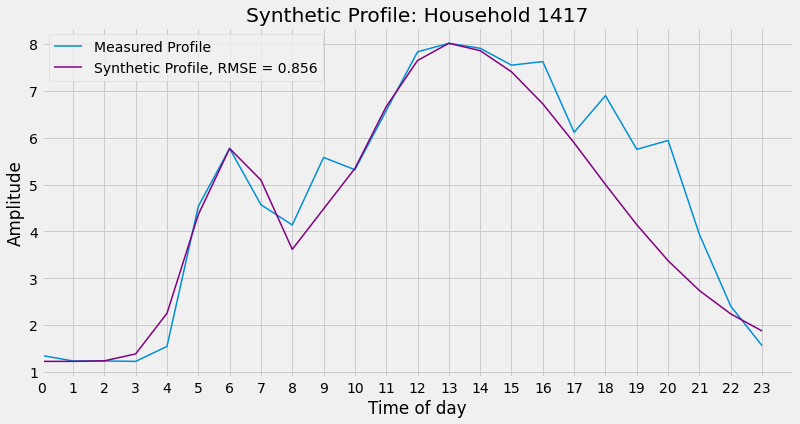

In [281]:
# build the plot
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')  

# Plot the households loadprofile
fig = plt.plot(describe_household(id = houseID).iloc[0,0:24], linewidth = 1.5, label = "Measured Profile")#, linestyle = 'dashed')
plt.title("Household "+str(i))
x_all = np.arange(0,24,1)
# Plot Gauss Fit
ax.plot(x_all,synth,linewidth = 1.5, color = 'purple',label = "Synthetic Profile, RMSE = " + str('{0:.3g}'.format(RMSE)))

plt.legend(loc = "upper left")
# Set the labels and axis limits
ax.set_xlim([0,24])
ax.set_xlabel('Time of day')
ax.set_ylabel("Amplitude")
ax.set_title('Synthetic Profile: Household ' + str(houseID))

# # Save the figure
plt.savefig('Synthetic Profile' + str(houseID) + '.png', dpi=72, bbox_inches='tight')
# plt.show()

#  Write code to calculate the RMSE of all households and plot a histogram of the RMSE

In [168]:
print(len(Xbin['1200-2500']))

319


In [909]:
for id in Xbin:
    print("ids = {}".format(id))

ids = 0-1
ids = 1-50
ids = 50-150
ids = 150-400
ids = 400-600
ids = 600-1200
ids = 1200-2500
ids = 2500-4000


In [307]:
for i in range(1,6):
    if i == 2:
        continue
    print(i)


1
3
4
5


In [326]:
# Create dataframe to store RMSE
list_ids = []
for id in Xbin['600-1200']:
    list_ids.append(id)

ids_df = pd.DataFrame(index = list_ids, columns = ['RMSE'])
counter = 0
for id in tqdm(Xbin['600-1200']):
    counter = counter + 1
    houseID = id
    df, check = describe_household(id = houseID)
    # Check whether the household has any morning/afternoon peaks
    if check == False:
        continue
    # Determine the y-offset i.e. minimum value in day
    H_offset = df.iloc[0,:24].min()

    # Determine the amplitude of gaussian
    A1 = df[str(df['0_x'].values[0])].values[0] - H_offset # Adjust for offset
    A2 = df[str(df['0_y'].values[0])].values[0] - H_offset

    # Determine the mean of the gaussian
    mu1 = df['0_x'].values[0]
    mu2 = df['0_y'].values[0]
    # **********************************************************************************************************************************************
    # Fit the first gaussian
    sigma1, i1 = Sigma1()

    # Calculate error
    actual = df.iloc[0,i1:df['0_x'].values[0]].to_list()
    predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)

    tolerance1 = RMSE - RMSE*0.95
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance1:
        previous_error1 = RMSE

        sigma1, i1= Sigma1(increment = i)
        predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)   
        # conditional for gauss 1
        if RMSE > previous_error1:
            i = i + 0.1
            sigma1, i1 = Sigma1(increment = i)
            predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE) 
        else:
            i = i - 0.1
            sigma1, i1 = Sigma1(increment = i)
            predicted = gauss(np.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE) 

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance1 = tolerance1 + 0.1

    RMSE1 = RMSE
    # print("RMSE1 = {}".format(RMSE1))
    sigma1 = np.sqrt(sigma1**2)
    # **********************************************************************************************************************************************
    # Fit the secnd gaussian
    sigma2, i2= Sigma2()

    # Calculate error
    actual = df.iloc[0,df['0_x'].values[0]:i2].to_list()
    predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)

    tolerance2 = RMSE - RMSE*0.95
    # print(tolerance2)
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance2:

        # print("RMSE = {}".format(RMSE))
        # print("tolerance2 = {}".format(tolerance2))
        # print("actual = {}".format(actual))
        # print("predicted = {}".format(predicted))
        previous_error2 = RMSE
        sigma2, i2 = Sigma2(increment = i)
        predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)
        
        # Conditional for gauss2
        if RMSE > previous_error2:
            i = i + 0.1
            sigma2, i2 = Sigma2(increment = i)
            predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)
        else:
            i = i -0.1        
            sigma2, i2 = Sigma2(increment = i)
            predicted = gauss(np.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)

        t = t + 1
        if t >= 1000:
            t = 0
            i = 0
            tolerance2 = tolerance2 + 0.1


    RMSE2 = RMSE
    # print("RMSE2 = {}".format(RMSE2))
    sigma2 = np.sqrt(sigma2**2)
    # **********************************************************************************************************************************************
    # Fit the third gaussian
    # Code that finds the value one point above the range index
    sigma3, i3 = Sigma3()

    # Calculate error
    actual = df.iloc[0,i3:df['0_y'].values[0]].to_list()
    predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)

    tolerance1 = RMSE - RMSE*0.95
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance1:
        previous_error3 = RMSE
        # print(sigma3)
        # print("RMSE = {}".format(RMSE))

        sigma3, i3 = Sigma3(increment = i)
        predicted = gauss(np.arange(i3,df['0_y'].values[0],1), H_offset, A2, mu2, sigma3)
        # print('actual = {}'.format(actual))
        # print('predicted = {}'.format(predicted))
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)

        # conditional for gauss 1
        if RMSE > previous_error3:
            i = i + 0.1
            sigma3, i3 = Sigma3(increment = i)
            predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)
        else:
            i = i - 0.1
            sigma3, i3 = Sigma3(increment = i)
            predicted = gauss(np.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance1 = tolerance1 + 0.1
    

    RMSE3 = RMSE
    # print("RMSE3 = {}".format(RMSE))
    sigma3 = np.sqrt(sigma3**2)
    # **********************************************************************************************************************************************
    # Fit the 4th gaussian
    sigma4, i4= Sigma4()

    actual = df.iloc[0,df['0_y'].values[0]:i4].to_list()
    predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)

    tolerance2 = RMSE - RMSE*0.95
    # print(tolerance2)
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance2:
        previous_error4 = RMSE
        # print('sigma4 = {}'.format(sigma4))
        # print('RMSE = {}'.format(RMSE))
        sigma4, i4 = Sigma4(increment = i)
        predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
        MSE = mean_squared_error(actual, predicted)
        RMSE = math.sqrt(MSE)
        
        # Conditional for gauss2
        if RMSE > previous_error4:
            i = i + 0.1
            sigma4, i4 = Sigma4(increment = i)
            predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)

        else:
            i = i - 0.1        
            sigma4, i4 = Sigma4(increment = i)
            predicted = gauss(np.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
            MSE = mean_squared_error(actual, predicted)
            RMSE = math.sqrt(MSE)

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance2 = tolerance2 + 0.1
    # print(tolerance2)
    RMSE4 = RMSE
    sigma4 = np.sqrt(sigma4**2)
    # **********************************************************************************************************************************************
    # Determine the complete synthetic profile
    x_1 = np.arange(0, mu1, 1)
    x_2 = np.arange(mu1, i2, 1)
    x_3 = np.arange(i3, mu2,1)
    x_4 = np.arange(mu2, 24,1)

    x_vals = np.hstack((x_1,x_2,x_3,x_4))
    x_vals_1 = np.unique(x_vals)

    y1 = gauss(x_1, H_offset,A1,mu1,sigma1)
    y2 = gauss(x_2, H_offset,A1,mu1,sigma2)
    y3 = gauss(x_3, H_offset,A2,mu2,sigma3)
    y4 = gauss(x_4, H_offset,A2,mu2,sigma4)

    if len(x_vals_1) == 24:
        # print("Entire array is captured")
        if x_2[-1] == x_3[0]:
            # print('repeating value')
            x_3 = x_3[1:] # Remove the first value of the x-array
            y3 = gauss(x_3, H_offset,A2,mu2,sigma3) # Re-calculate the y-values for gauss 3
            synth = np.hstack((y1,y2,y3,y4)) # Generate the synthetic values
        else:
            synth = np.hstack((y1,y2,y3,y4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values

    else:
        # print("Missing hours need to be saved")
        x_5 = np.arange(i2,i3,1)
        x_vals_1 = np.hstack((x_1,x_2,x_5,x_3,x_4))
        x_vals_1 = np.unique(x_vals_1)

        # Synthesize the mid range behaviour
        m = (gauss(x_3[0], H_offset,A2,mu2,sigma3) - gauss(x_2[-1], H_offset,A1,mu1,sigma2))/(x_3[0]-x_2[-1]) # Calculate slope
        b = gauss(x_3[0], H_offset,A2,mu2,sigma3) - m*x_3[0] # Calculate b constant for straight line equation
        y_mid = straight_line(m,x_5,b)

        synth = np.hstack((y1,y2,y_mid,y3,y4))
    # **********************************************************************************************************************************************
    # Calculate the synthetic profiles RMSE
    actual = df.iloc[0,0:24]
    predicted = synth
    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    # **********************************************************************************************************************************************
    # Store the RMSE error
    ids_df.loc[id] = RMSE
    # **********************************************************************************************************************************************
    if counter%50 == 0:
        # Save plot of fit
        fig, ax = plt.subplots(figsize=(12,6))
        plt.style.use('fivethirtyeight')  

        # Plot the households loadprofile
        fig = plt.plot(describe_household(id = houseID).iloc[0,0:24], linewidth = 1.5, label = "Measured Profile")#, linestyle = 'dashed')
        plt.title("Household "+str(i))
        x_all = np.arange(0,24,1)
        # Plot Gauss Fit
        ax.plot(x_all,synth,linewidth = 1.5, color = 'purple',label = "Synthetic Profile, RMSE = " + str('{0:.3g}'.format(RMSE)))

        plt.legend(loc = "upper left")
        # Set the labels and axis limits
        ax.set_xlim([0,24])
        ax.set_xlabel('Time of day')
        ax.set_ylabel("Amplitude")
        ax.set_title('Synthetic Profile: Household ' + str(houseID))

        # # Save the figure
        plt.savefig('Synthetic Profile' + str(houseID) + '.png', dpi=72, bbox_inches='tight')
    # **********************************************************************************************************************************************
    # **********************************************************************************************************************************************
    # **********************************************************************************************************************************************


<ipython-input-326-9c208eaef35e>:8: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1500 [00:00<?, ?it/s]

In [180]:
id

17

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,0_x,0_y
0,9.187829,8.066416,7.47914,7.227527,7.319854,7.34624,8.866,9.186962,10.091768,10.966717,...,8.697976,12.967574,14.589599,16.168695,16.056045,15.153806,12.866735,10.815511,9,13


In [934]:
df_ids_600_1200 = ids_df.copy()

In [947]:
df_ids_600_1200['RMSE'].unique()

array([1.5869524328596147, nan], dtype=object)

### Running Synthetic Profile fit code using Cupy and numba

In [44]:
import cupy as cp
from numba import jit
from sklearn.metrics import mean_squared_error

In [322]:
# Create dataframe to store RMSE
list_ids = []
for id in Xbin['1200-2500']:
    list_ids.append(id)

ids_df = pd.DataFrame(index = list_ids, columns = ['RMSE'])

for id in tqdm(Xbin['1200-2500']):
    houseID = id
    df, check = describe_household(id = houseID)

    # Determine the y-offset i.e. minimum value in day
    H_offset = df.iloc[0,:24].min()

    # Determine the amplitude of gaussian
    A1 = df[str(df['0_x'].values[0])].values[0] - H_offset # Adjust for offset
    A2 = df[str(df['0_y'].values[0])].values[0] - H_offset

    # Determine the mean of the gaussian
    mu1 = df['0_x'].values[0]
    mu2 = df['0_y'].values[0]
    # **********************************************************************************************************************************************
    # Fit the first gaussian
    sigma1, i1 = Sigma1()

    # Calculate error
    actual = df.iloc[0,i1:df['0_x'].values[0]].to_list()
    predicted = gauss(cp.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1)
    MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
    RMSE = cp.sqrt(MSE)

    tolerance1 = RMSE - RMSE*0.95
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance1:
        previous_error1 = RMSE

        sigma1, i1= Sigma1(increment = i)
        predicted = gauss(cp.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
        MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
        RMSE = cp.sqrt(MSE)   
        # conditional for gauss 1
        if RMSE > previous_error1:
            i = i + 0.1
            sigma1, i1 = Sigma1(increment = i)
            predicted = gauss(cp.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE) 
        else:
            i = i - 0.1
            sigma1, i1 = Sigma1(increment = i)
            predicted = gauss(cp.arange(i1,df['0_x'].values[0],1),H_offset,A1,mu1,sigma1) # Get the value of the gauss one point above the min peak
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE) 

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance1 = tolerance1 + 0.1

    RMSE1 = RMSE
    # print("RMSE1 = {}".format(RMSE1))
    sigma1 = cp.sqrt(sigma1**2)
    # **********************************************************************************************************************************************
    # Fit the secnd gaussian
    sigma2, i2= Sigma2()

    # Calculate error
    actual = df.iloc[0,df['0_x'].values[0]:i2].to_list()
    predicted = gauss(cp.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
    MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
    RMSE = cp.sqrt(MSE)

    tolerance2 = RMSE - RMSE*0.95
    # print(tolerance2)
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance2:

        # print("RMSE = {}".format(RMSE))
        # print("tolerance2 = {}".format(tolerance2))
        # print("actual = {}".format(actual))
        # print("predicted = {}".format(predicted))
        previous_error2 = RMSE
        sigma2, i2 = Sigma2(increment = i)
        predicted = gauss(cp.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
        MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
        RMSE = cp.sqrt(MSE)
        
        # Conditional for gauss2
        if RMSE > previous_error2:
            i = i + 0.1
            sigma2, i2 = Sigma2(increment = i)
            predicted = gauss(cp.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)
        else:
            i = i -0.1        
            sigma2, i2 = Sigma2(increment = i)
            predicted = gauss(cp.arange(df['0_x'].values[0],i2,1),H_offset,A1,mu1,sigma2)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)

        t = t + 1
        if t >= 1000:
            t = 0
            i = 0
            tolerance2 = tolerance2 + 0.1


    RMSE2 = RMSE
    # print("RMSE2 = {}".format(RMSE2))
    sigma2 = cp.sqrt(sigma2**2)
    # **********************************************************************************************************************************************
    # Fit the third gaussian
    # Code that finds the value one point above the range index
    sigma3, i3 = Sigma3()

    # Calculate error
    actual = df.iloc[0,i3:df['0_y'].values[0]].to_list()
    predicted = gauss(cp.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
    MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
    RMSE = cp.sqrt(MSE)

    tolerance1 = RMSE - RMSE*0.95
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance1:
        previous_error3 = RMSE
        # print(sigma3)
        # print("RMSE = {}".format(RMSE))

        sigma3, i3 = Sigma3(increment = i)
        predicted = gauss(cp.arange(i3,df['0_y'].values[0],1), H_offset, A2, mu2, sigma3)
        # print('actual = {}'.format(actual))
        # print('predicted = {}'.format(predicted))
        MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
        RMSE = cp.sqrt(MSE)

        # conditional for gauss 1
        if RMSE > previous_error3:
            i = i + 0.1
            sigma3, i3 = Sigma3(increment = i)
            predicted = gauss(cp.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)
        else:
            i = i - 0.1
            sigma3, i3 = Sigma3(increment = i)
            predicted = gauss(cp.arange(i3,df['0_y'].values[0],1),H_offset,A2,mu2,sigma3)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance1 = tolerance1 + 0.1
    

    RMSE3 = RMSE
    # print("RMSE3 = {}".format(RMSE))
    sigma3 = cp.sqrt(sigma3**2)
    # **********************************************************************************************************************************************
    # Fit the 4th gaussian
    sigma4, i4= Sigma4()

    actual = df.iloc[0,df['0_y'].values[0]:i4].to_list()
    predicted = gauss(cp.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
    MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
    RMSE = cp.sqrt(MSE)

    tolerance2 = RMSE - RMSE*0.95
    # print(tolerance2)
    i = 0.1 # Constant value by which to increase/decrease the range in the initial sigma function
    t = 0
    while RMSE > tolerance2:
        previous_error4 = RMSE
        # print('sigma4 = {}'.format(sigma4))
        # print('RMSE = {}'.format(RMSE))
        sigma4, i4 = Sigma4(increment = i)
        predicted = gauss(cp.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
        MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
        RMSE = cp.sqrt(MSE)
        
        # Conditional for gauss2
        if RMSE > previous_error4:
            i = i + 0.1
            sigma4, i4 = Sigma4(increment = i)
            predicted = gauss(cp.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)

        else:
            i = i - 0.1        
            sigma4, i4 = Sigma4(increment = i)
            predicted = gauss(cp.arange(df['0_y'].values[0],i4,1),H_offset,A2,mu2,sigma4)
            MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
            RMSE = cp.sqrt(MSE)

        t = t + 1
        if t >= 10000:
            t = 0
            i = 0
            tolerance2 = tolerance2 + 0.1
    # print(tolerance2)
    RMSE4 = RMSE
    sigma4 = cp.sqrt(sigma4**2)
    # **********************************************************************************************************************************************
    # Determine the complete synthetic profile
    x_1 = cp.arange(0, mu1, 1)
    x_2 = cp.arange(mu1, i2, 1)
    x_3 = cp.arange(i3, mu2,1)
    x_4 = cp.arange(mu2, 24,1)

    x_vals = cp.hstack((x_1,x_2,x_3,x_4))
    x_vals_1 = cp.unique(x_vals)

    y1 = gauss(x_1, H_offset,A1,mu1,sigma1)
    y2 = gauss(x_2, H_offset,A1,mu1,sigma2)
    y3 = gauss(x_3, H_offset,A2,mu2,sigma3)
    y4 = gauss(x_4, H_offset,A2,mu2,sigma4)

    if len(x_vals_1) == 24:
        # print("Entire array is captured")
        if x_2[-1] == x_3[0]:
            # print('repeating value')
            x_3 = x_3[1:] # Remove the first value of the x-array
            y3 = gauss(x_3, H_offset,A2,mu2,sigma3) # Re-calculate the y-values for gauss 3
            synth = cp.hstack((y1,y2,y3,y4)) # Generate the synthetic values
        else:
            synth = cp.hstack((y1,y2,y3,y4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values

    else:
        # print("Missing hours need to be saved")
        x_5 = cp.arange(i2,i3,1)
        x_vals_1 = cp.hstack((x_1,x_2,x_5,x_3,x_4))
        x_vals_1 = cp.unique(x_vals_1)

        # Synthesize the mid range behaviour
        m = (gauss(x_3[0], H_offset,A2,mu2,sigma3) - gauss(x_2[-1], H_offset,A1,mu1,sigma2))/(x_3[0]-x_2[-1]) # Calculate slope
        b = gauss(x_3[0], H_offset,A2,mu2,sigma3) - m*x_3[0] # Calculate b constant for straight line equation
        y_mid = straight_line(m,x_5,b)

        synth = cp.hstack((y1,y2,y_mid,y3,y4))
    # **********************************************************************************************************************************************
    # Calculate the synthetic profiles RMSE
    actual = df.iloc[0,0:24]
    predicted = synth
    MSE = mean_squared_error(cp.asarray(actual).get(), cp.asarray(predicted).get())
    RMSE = cp.sqrt(MSE)
    # **********************************************************************************************************************************************
    # Store the RMSE error
    ids_df.loc[id] = RMSE
    # **********************************************************************************************************************************************
    # **********************************************************************************************************************************************
    # **********************************************************************************************************************************************
    # **********************************************************************************************************************************************

<ipython-input-322-23c71a923985>:8: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/319 [00:00<?, ?it/s]

NameError: name 'cp' is not defined